In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
import keras.backend as K
from keras.callbacks import EarlyStopping

C:\Users\Artem\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


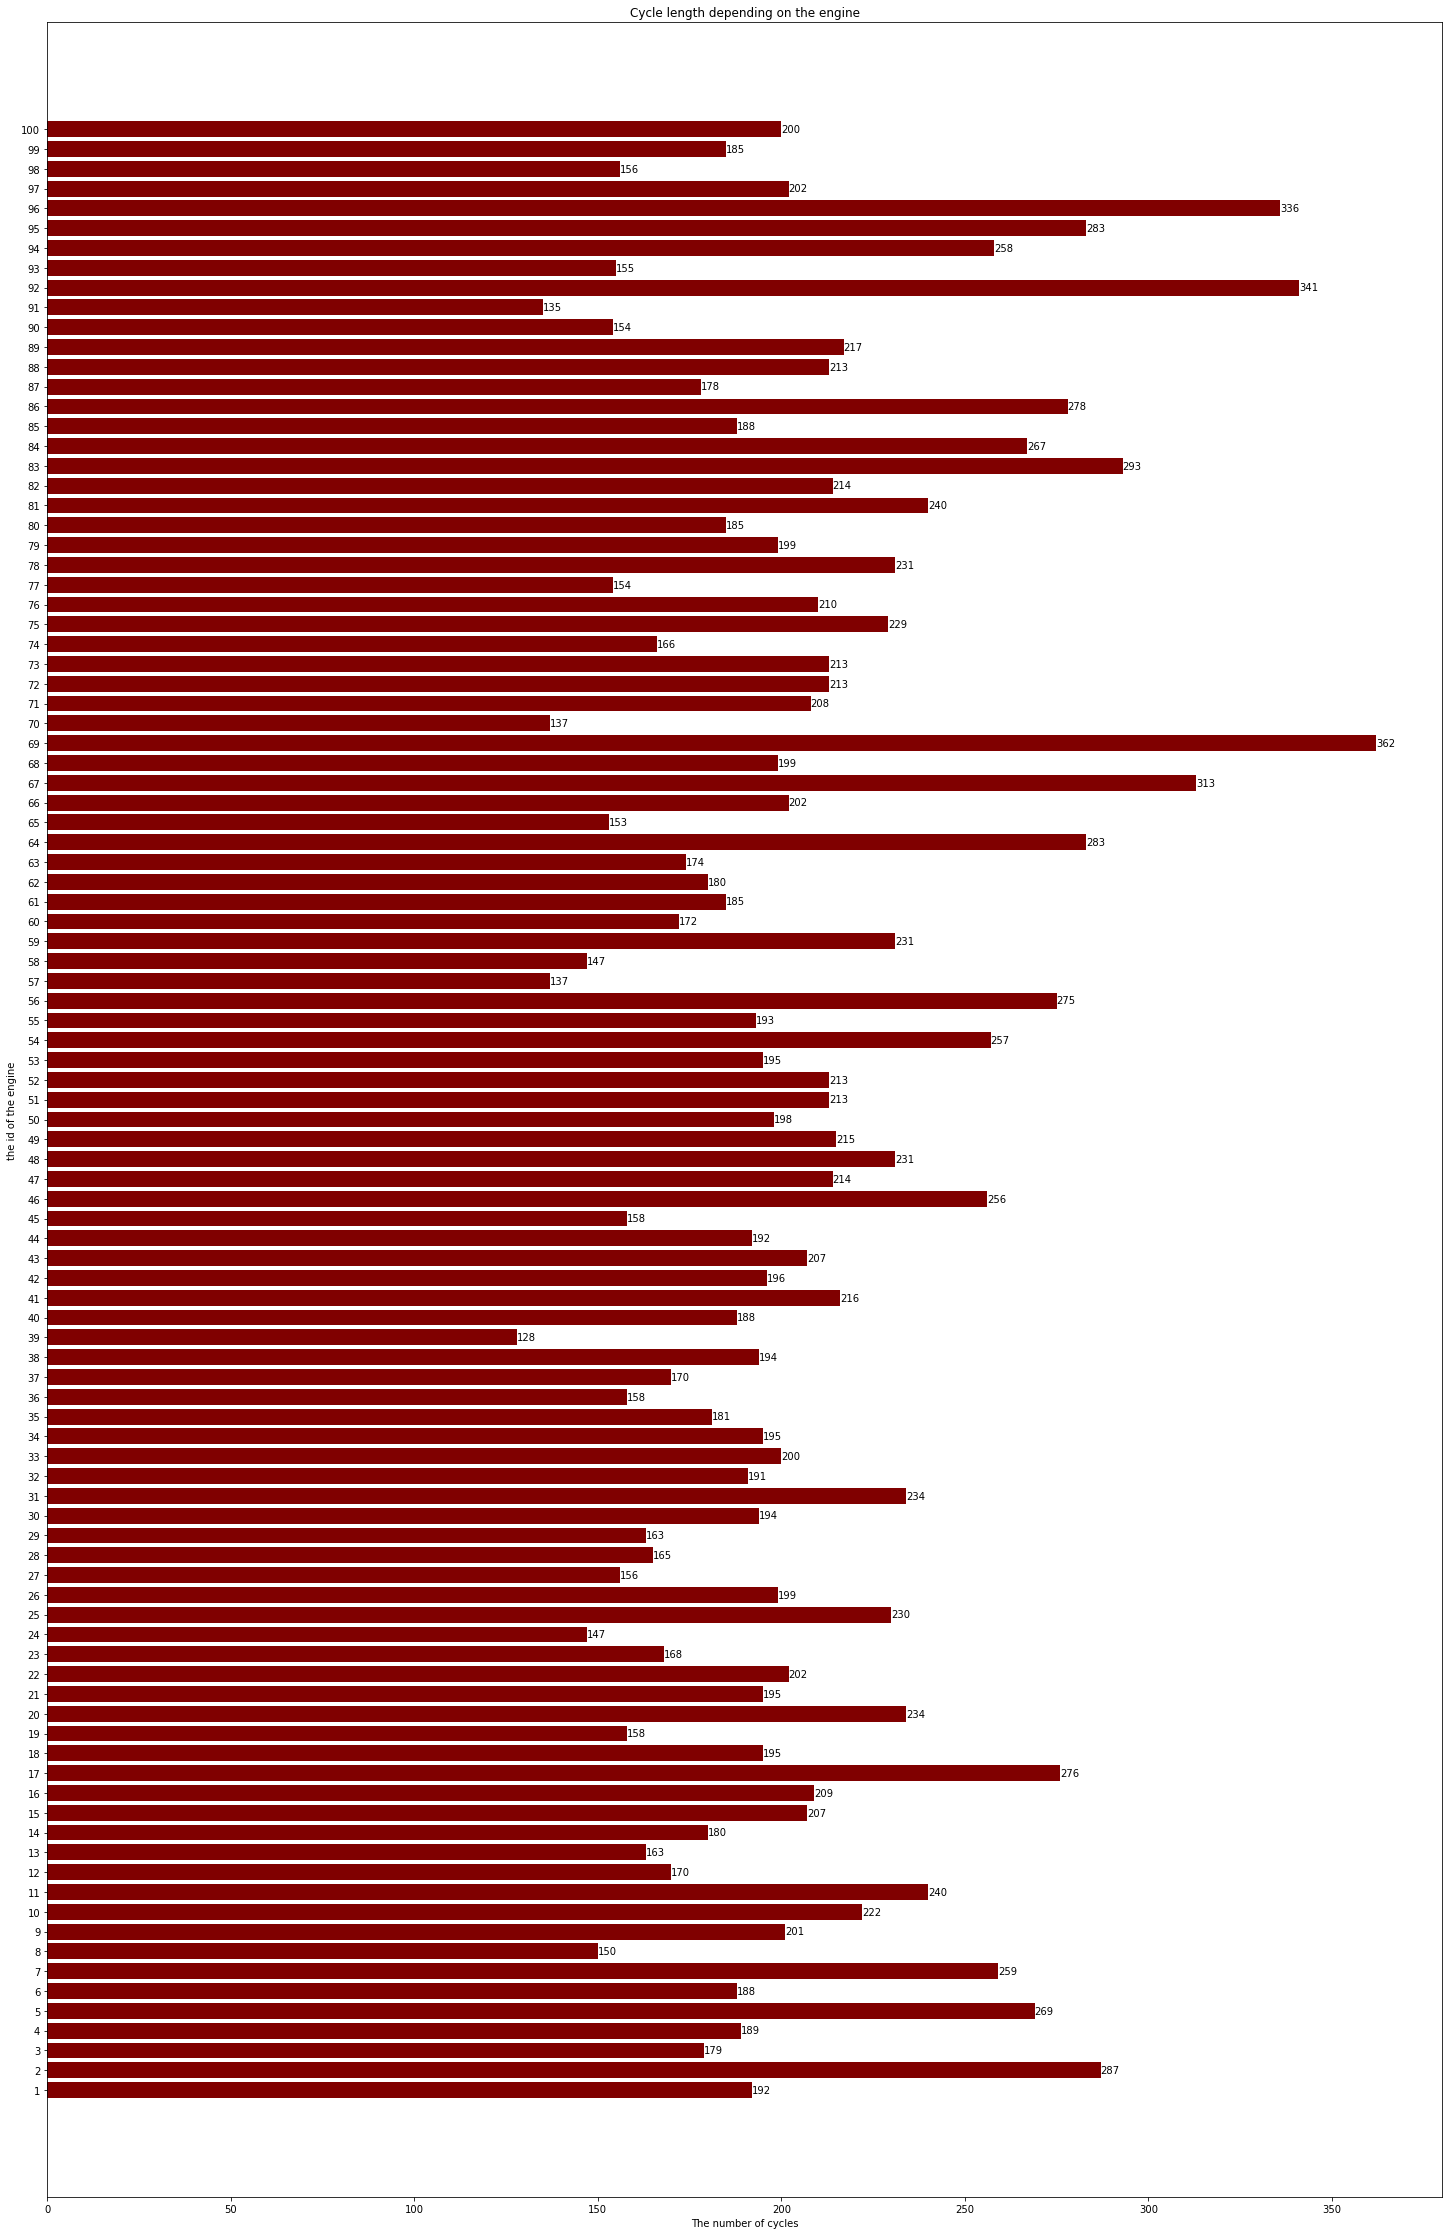

0          1
192        2
479        3
658        4
847        5
        ... 
19552     96
19888     97
20090     98
20246     99
20431    100
Name: engine_id, Length: 100, dtype: int64
engine_id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycles, Length: 100, dtype: int64


In [2]:
#create the column names
column_names_generic = ['engine_id', 'time_cycles', 'setting_1', 'setting_2', 'setting_3']
column_names_sensors = ['sensor' + str(x) for x in range(0,21)]
column_headers = column_names_generic + column_names_sensors

#upload the training and test datasets
df_train = pd.read_csv("CMaps/train_FD001.txt", sep='\s+', header=None, index_col=False, names=column_headers)
df_test = pd.read_csv("CMaps/test_FD001.txt", sep='\s+', header=None, index_col=False, names=column_headers)
df_ground_tr = pd.read_csv("CMaps/RUL_FD001.txt", sep='\s+', header=None)

engines = df_train['engine_id'].drop_duplicates()
max_num_cycles = df_train['time_cycles'].groupby(df_train['engine_id']).max()

#set the size of a plot
fig, ax = plt.subplots(figsize=(25, 40))

#creating the bar plot
bars = ax.barh(engines, max_num_cycles, color='maroon')
ax.bar_label(bars)

#create names on y axis
plt.yticks(engines)
plt.xlabel("The number of cycles")
plt.ylabel("the id of the engine")
plt.title("Cycle length depending on the engine")
plt.show()


print(engines)
print(max_num_cycles)

In [3]:
#create two datasets that contain first and last recording of corresponding engines
df_max_values = df_train.loc[df_train['time_cycles'].groupby(df_train['engine_id']).idxmax()]
df_max_values_test = df_test.loc[df_test['time_cycles'].groupby(df_test['engine_id']).idxmax()]


In [4]:
df_max_values

,engine_id,time_cycles,setting_1,setting_2,setting_3,sensor0,sensor1,sensor2,sensor3,sensor4,...,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649
478,2,287,-0.0005,0.0006,100.0,518.67,643.85,1608.50,1430.84,14.62,...,519.81,2388.21,8175.57,8.5365,0.03,398,2388,100.0,38.43,23.0848
657,3,179,0.0012,0.0000,100.0,518.67,643.51,1604.80,1428.23,14.62,...,519.53,2388.20,8255.34,8.5056,0.03,398,2388,100.0,38.40,22.9562
846,4,189,-0.0024,-0.0002,100.0,518.67,644.53,1612.11,1432.55,14.62,...,519.84,2388.16,8259.42,8.5246,0.03,398,2388,100.0,38.44,23.1006
1115,5,269,0.0022,0.0003,100.0,518.67,643.46,1597.28,1430.74,14.62,...,519.86,2388.16,8212.75,8.5209,0.03,397,2388,100.0,38.45,23.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19887,96,336,-0.0031,-0.0005,100.0,518.67,643.74,1599.20,1432.12,14.62,...,519.18,2388.24,8144.03,8.5022,0.03,397,2388,100.0,38.36,23.0258
20089,97,202,0.0014,0.0001,100.0,518.67,643.79,1610.66,1427.41,14.62,...,519.91,2388.15,8263.63,8.5277,0.03,397,2388,100.0,38.29,23.1184
20245,98,156,0.0077,-0.0003,100.0,518.67,643.02,1603.77,1432.16,14.62,...,519.55,2388.26,8122.22,8.5308,0.03,396,2388,100.0,38.33,23.1137
20430,99,185,-0.0019,-0.0004,100.0,518.67,643.93,1598.42,1421.56,14.62,...,519.99,2388.24,8127.53,8.5425,0.03,397,2388,100.0,38.49,23.1931


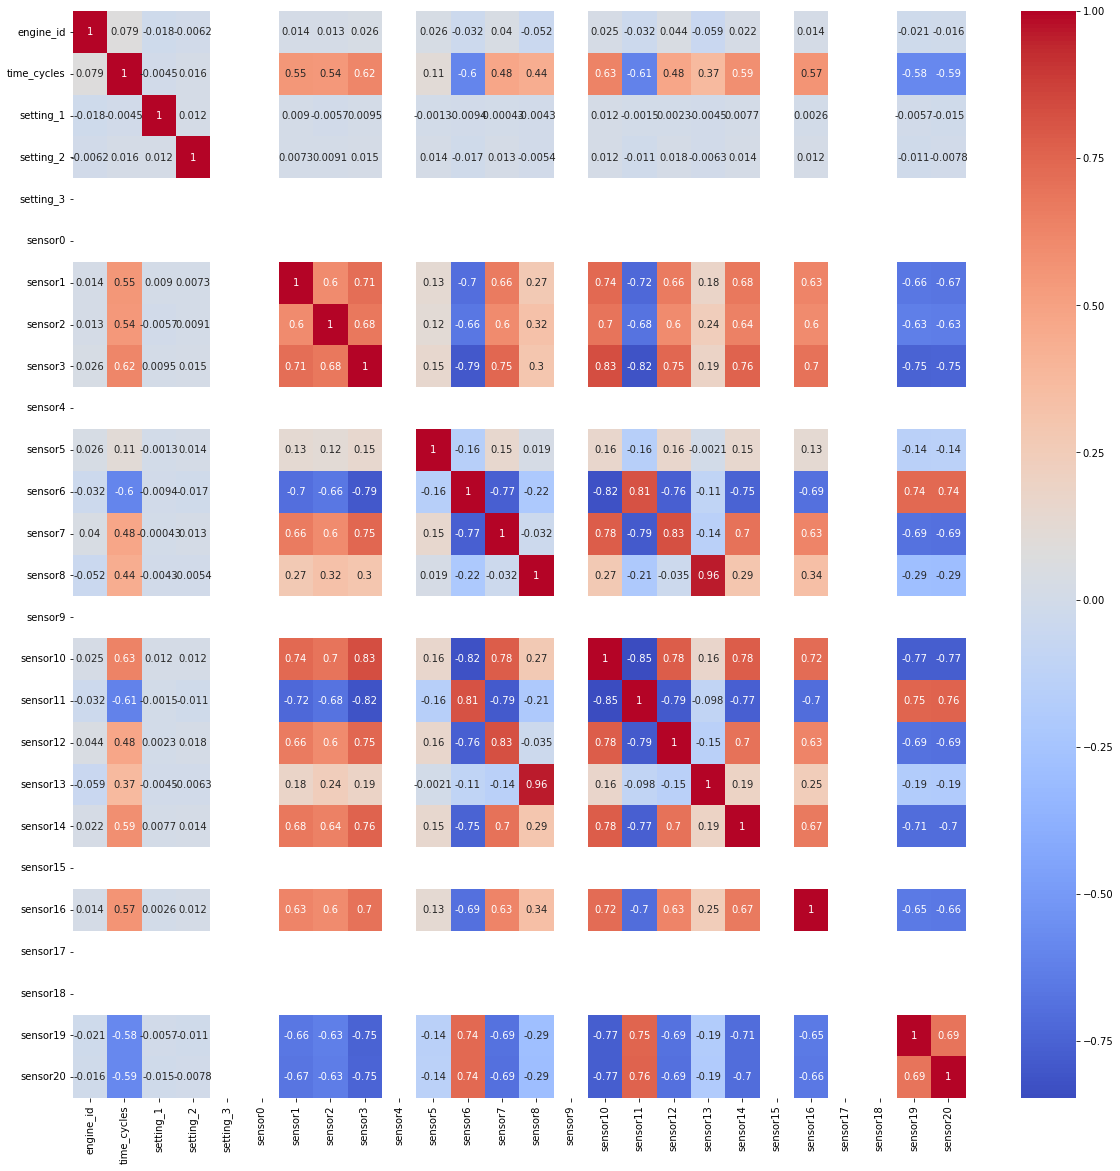

In [5]:
#plotting correlation heatmap matrix
fig, ax = plt.subplots(figsize=(20,20))

corr_plot = sb.heatmap(df_train.corr(), cmap="coolwarm", annot=True, ax=ax)

plt.show()

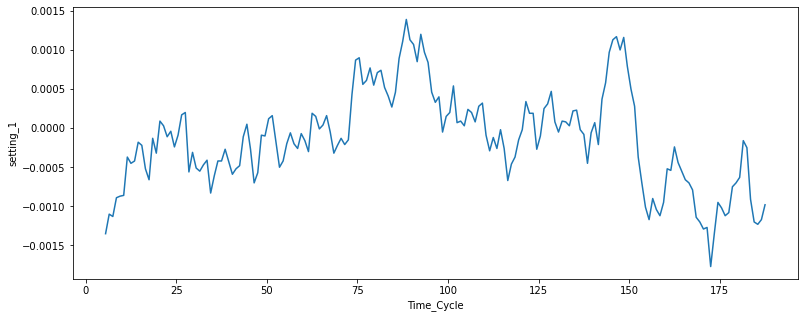

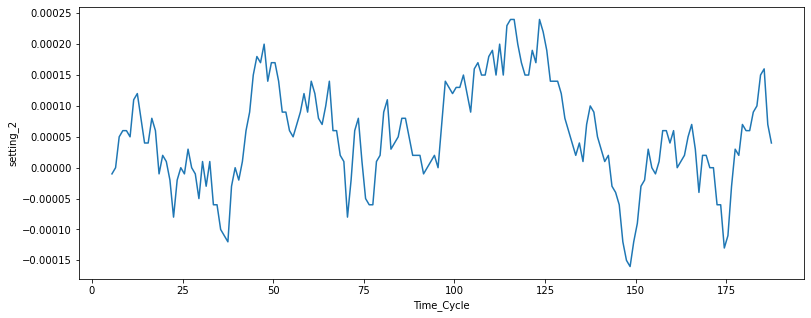

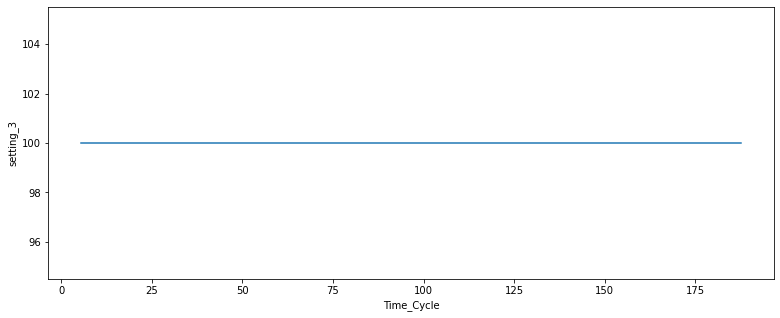

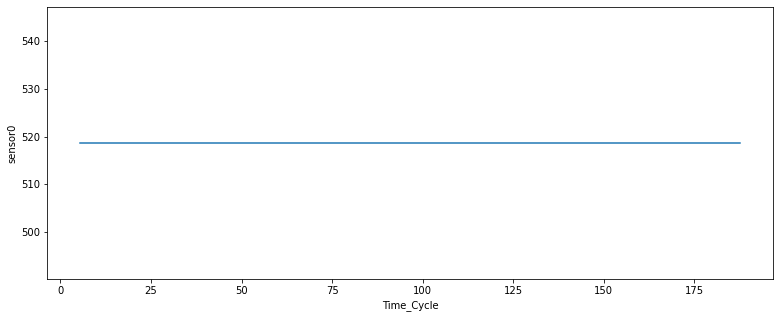

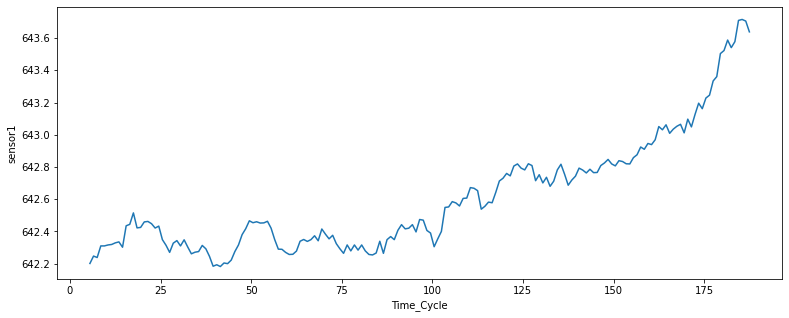

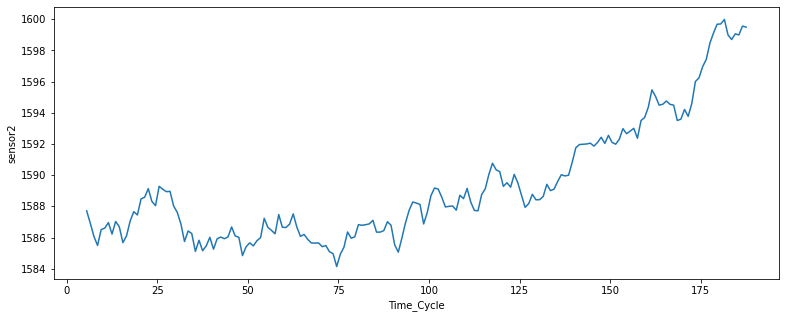

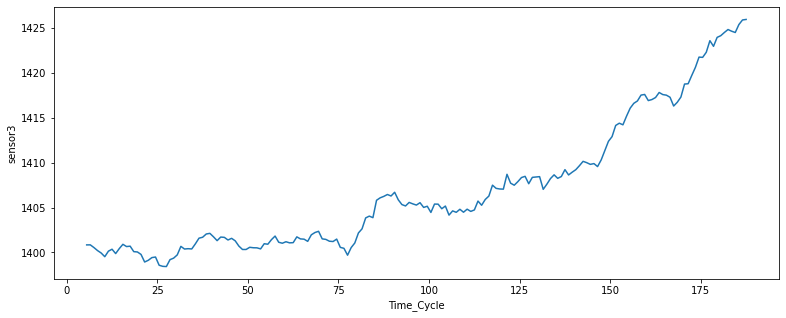

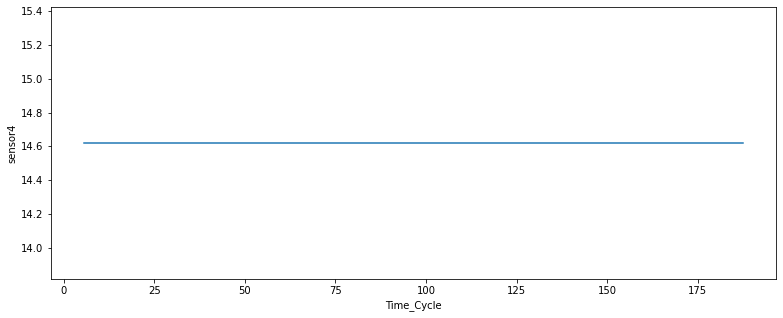

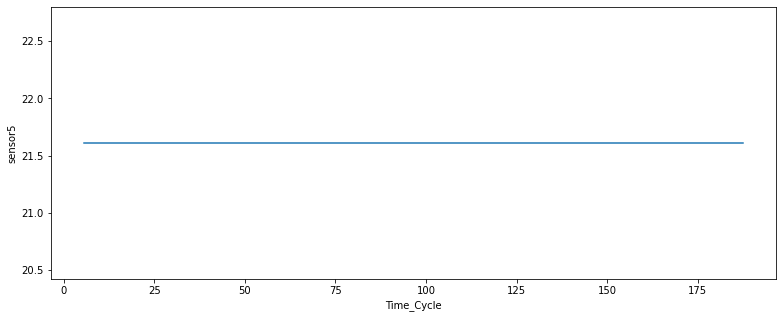

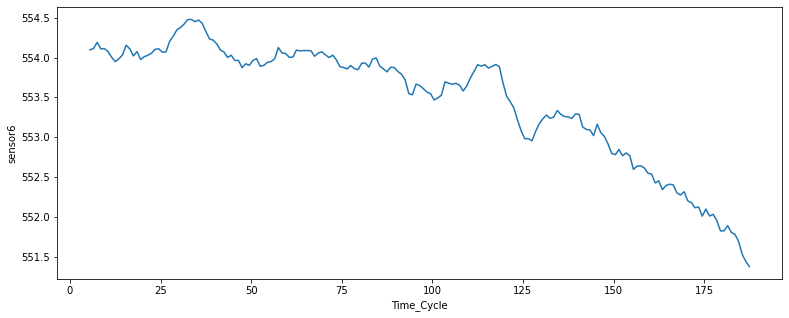

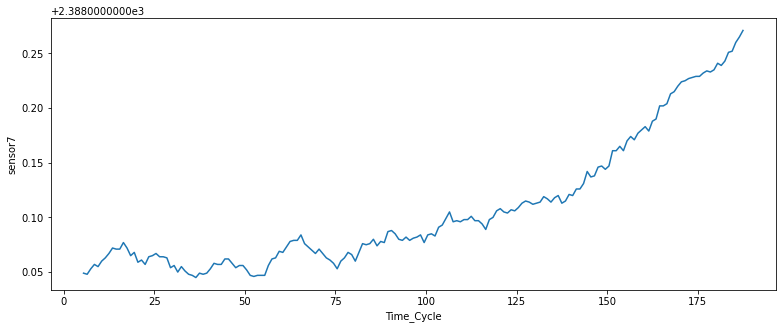

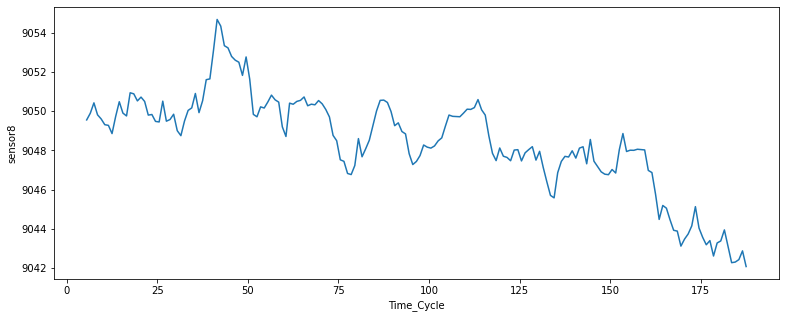

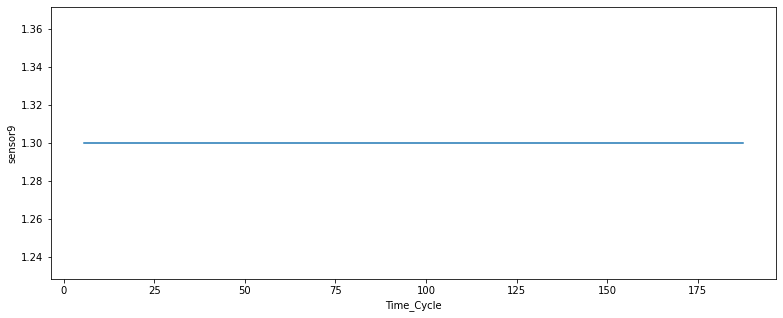

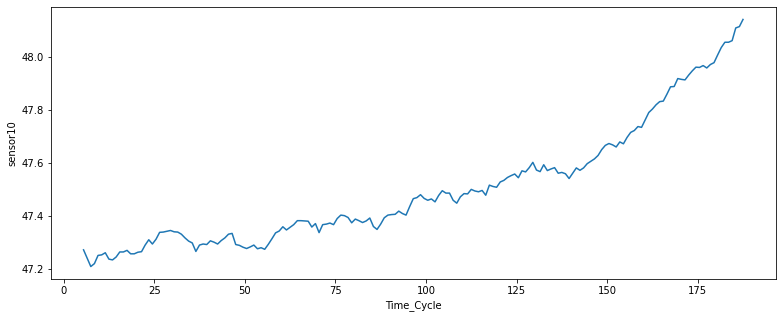

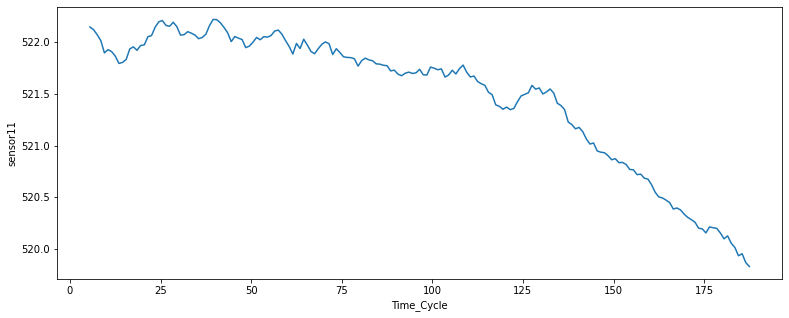

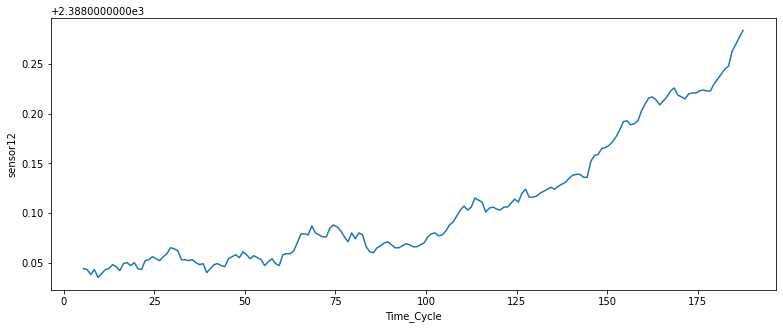

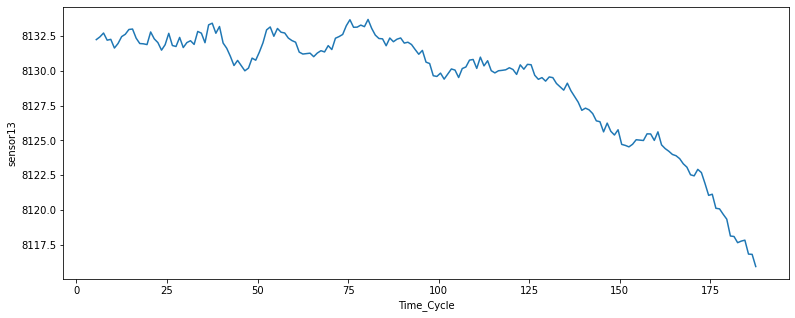

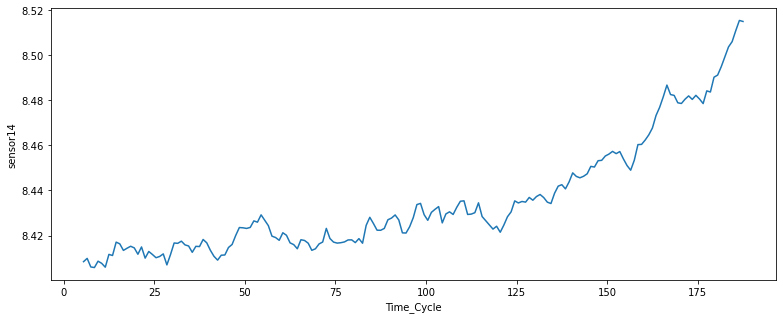

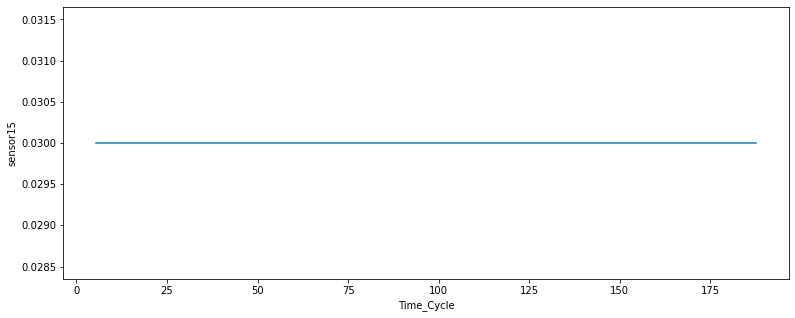

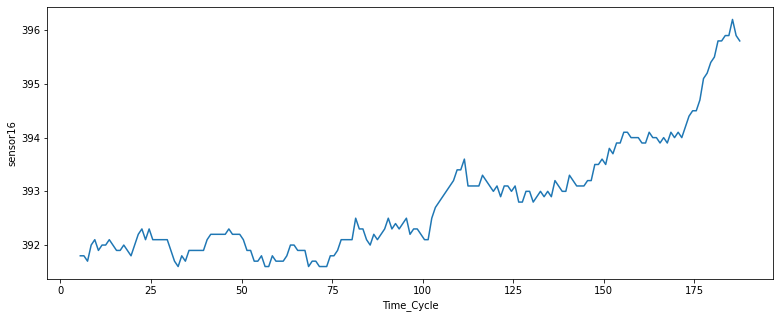

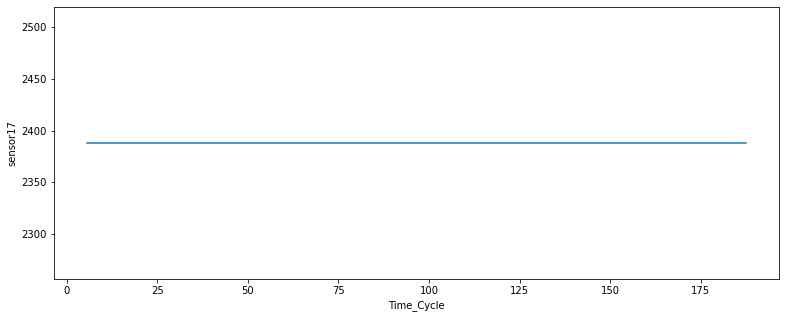

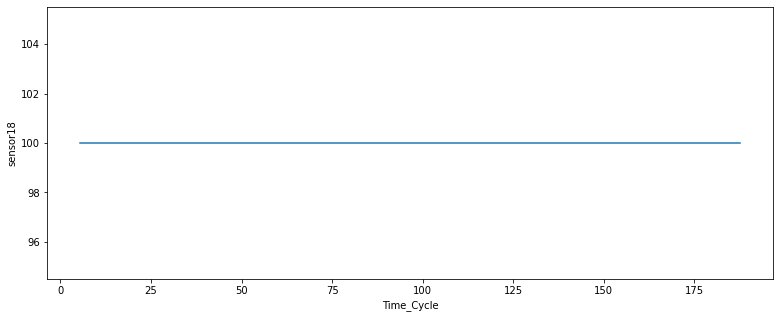

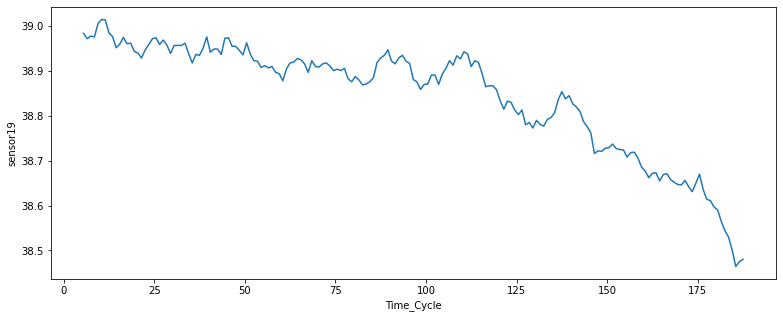

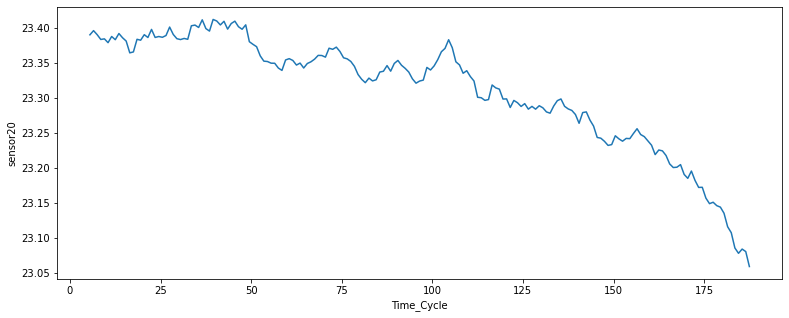

In [6]:
#check the dynamics of all the features to find the static features that do not change over the time
def features_plots(df, feature_name):
    plt.figure(figsize=(13,5))
    for i in df['engine_id'].unique():
        if i == 1:
        #if(i % 10 == 0):
            plt.plot('time_cycles', feature_name, data=df[df['engine_id']==i].rolling(10).mean())

    plt.ylabel(feature_name)
    plt.xlabel('Time_Cycle')
    plt.show()            

#get the columns names besides the first two for further plotting
df_column_names = df_train.columns.values[2:].tolist()

#call the function for plotting for every column name
for col in df_column_names:
    features_plots(df_train, col)

In [7]:
df_train = df_train.drop(columns=['setting_3', 'sensor0', 'sensor4', 'sensor9', 'sensor15', 'sensor17', 'sensor18'], axis=1)
df_test = df_test.drop(columns=['setting_3', 'sensor0', 'sensor4', 'sensor9', 'sensor15', 'sensor17', 'sensor18'], axis=1)
df_max_values = df_max_values.drop(columns=['setting_3', 'sensor0', 'sensor4', 'sensor9', 'sensor15', 'sensor17', 'sensor18'],\
                                   axis=1)
df_max_values_test = df_max_values_test.drop(columns=['setting_3', 'sensor0', 'sensor4', 'sensor9', 'sensor15', 'sensor17', \
                                                      'sensor18'], axis=1)


In [8]:
df_train

,engine_id,time_cycles,setting_1,setting_2,sensor1,sensor2,sensor3,sensor5,sensor6,sensor7,sensor8,sensor10,sensor11,sensor12,sensor13,sensor14,sensor16,sensor19,sensor20
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


In [9]:
#extract only two columns from the dataset containing max values, namely the engine_id and the time_cycles
rul = df_max_values[['engine_id', 'time_cycles']].copy()
#rename the second column from time_cycles to max, not to have two columns equally named
rul.columns = ['engine_id', 'max']
#merge the two columns with the training dataset
df_train = df_train.merge(rul, on=['engine_id'], how='left')
#calculate the Remaining Usefull Life and add as a column
df_train['RUL'] = df_train['max'] - df_train['time_cycles']

In [10]:
#set the window size
window_size = 30
#insert the first label
df_train['label_1'] = np.where((df_train['time_cycles'] == df_train['max']), 1, 0)
#insert the second label
df_train['label_2'] = np.where(df_train['RUL'] <= window_size, 1, 0)

#remove unnecessary column
df_train.drop(['max'], axis=1, inplace=True)

In [11]:
df_train

,engine_id,time_cycles,setting_1,setting_2,sensor1,sensor2,sensor3,sensor5,sensor6,sensor7,...,sensor11,sensor12,sensor13,sensor14,sensor16,sensor19,sensor20,RUL,label_1,label_2
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,...,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4,0,1
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,...,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3,0,1
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,...,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2,0,1
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,...,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1,0,1


In [12]:
#create new column time_cycles that will be normalized
df_train['cycles_norm'] = df_train['time_cycles']
#exclude some of the columns from the normaliaztion process
columns_to_norm = df_train.columns.difference(['engine_id', 'time_cycles', 'RUL', 'label_1', 'label_2'])
#initiate scaler
scaler = MinMaxScaler()
#normalization process
df_train_normalized = pd.DataFrame(scaler.fit_transform(df_train[columns_to_norm]), columns = columns_to_norm,  \
                                   index=df_train.index)
#combine two data frames: one with normalized columns and one with the rest
df_combined = df_train[df_train.columns.difference(columns_to_norm)].join(df_train_normalized)
df_train = df_combined.reindex(columns = df_train.columns)
df_train

,engine_id,time_cycles,setting_1,setting_2,sensor1,sensor2,sensor3,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor16,sensor19,sensor20,RUL,label_1,label_2,cycles_norm
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191,0,0,0.000000
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190,0,0,0.002770
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189,0,0,0.005540
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188,0,0,0.008310
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187,0,0,0.011080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.686747,0.587312,0.782917,1.0,0.254428,0.439394,...,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4,0,1,0.540166
20627,100,197,0.408046,0.083333,0.701807,0.729453,0.866475,1.0,0.162641,0.500000,...,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3,0,1,0.542936
20628,100,198,0.522989,0.500000,0.665663,0.684979,0.775321,1.0,0.175523,0.515152,...,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2,0,1,0.545706
20629,100,199,0.436782,0.750000,0.608434,0.746021,0.747468,1.0,0.133655,0.530303,...,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1,0,1,0.548476


In [13]:
df_test['cycles_norm'] = df_test['time_cycles']
df_test_normalized = pd.DataFrame(scaler.fit_transform(df_test[columns_to_norm]), columns = columns_to_norm, index=df_test.index)
df_combined_test = df_test[df_test.columns.difference(columns_to_norm)].join(df_test_normalized)
df_test = df_combined_test.reindex(columns = df_test.columns)
df_test

,engine_id,time_cycles,setting_1,setting_2,sensor1,sensor2,sensor3,sensor5,sensor6,sensor7,sensor8,sensor10,sensor11,sensor12,sensor13,sensor14,sensor16,sensor19,sensor20,cycles_norm
0,1,1,0.65625,0.692308,0.596215,0.421968,0.282214,1.0,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.152259,0.347076,0.375,0.500000,0.620099,0.000000
1,1,2,0.34375,0.230769,0.182965,0.504025,0.225240,1.0,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.277907,0.227709,0.500,0.645455,0.645718,0.003311
2,1,3,0.53125,0.538462,0.419558,0.464814,0.346130,1.0,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.192892,0.533557,0.500,0.700000,0.681104,0.006623
3,1,4,0.77500,0.461538,0.413249,0.391587,0.449867,1.0,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.217896,0.282359,0.250,0.627273,0.620382,0.009934
4,1,5,0.60000,0.461538,0.435331,0.471306,0.357974,1.0,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.187891,0.337009,0.125,0.618182,0.676008,0.013245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.81875,0.461538,0.665615,0.789665,0.641209,1.0,0.510081,0.317073,0.902989,0.609589,0.299087,0.255814,0.935703,0.664909,0.625,0.309091,0.370842,0.639073
13092,100,195,0.44375,0.384615,0.659306,0.692028,0.769042,1.0,0.471774,0.390244,0.890038,0.547945,0.381279,0.465116,0.914003,0.567593,0.750,0.236364,0.483652,0.642384
13093,100,196,0.47500,0.230769,0.728707,0.626071,0.458036,1.0,0.435484,0.536585,0.937011,0.527397,0.410959,0.348837,0.971066,0.594919,0.750,0.281818,0.381741,0.645695
13094,100,197,0.27500,0.538462,0.671924,0.673851,0.714111,1.0,0.502016,0.439024,0.952644,0.554795,0.445205,0.441860,1.000000,0.662991,0.750,0.318182,0.473461,0.649007


In [14]:
df_ground_tr.columns = ['more']
df_ground_tr['engine_id'] = df_ground_tr.index + 1
df_ground_tr

,more,engine_id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [15]:
#extract only two columns from the dataset containing max values, namely the engine_id and the time_cycles
rul_test = df_max_values_test[['engine_id', 'time_cycles']].copy()
#rename the second column from time_cycles to max, not to have two columns equally named
rul_test.columns = ['engine_id', 'max']

df_merged = pd.merge(rul_test, df_ground_tr, on='engine_id')
df_merged['max_sum'] = df_merged['max'] + df_merged['more']
df_merged.drop(['max', 'more'], axis=1, inplace = True)
df_merged.set_index('engine_id', inplace = True)
df_merged

,max_sum
engine_id,
1,143
2,147
3,195
4,188
5,189
...,...
96,234
97,216
98,180


In [16]:
#merge the datasets based on engine_id
df_test = df_test.merge(df_merged, on=['engine_id'], how='left')

#calculating the RUL 
df_test['RUL'] = df_test['max_sum'] - df_test['time_cycles']
df_test.drop(['max_sum'], axis=1, inplace=True)
df_test

,engine_id,time_cycles,setting_1,setting_2,sensor1,sensor2,sensor3,sensor5,sensor6,sensor7,...,sensor10,sensor11,sensor12,sensor13,sensor14,sensor16,sensor19,sensor20,cycles_norm,RUL
0,1,1,0.65625,0.692308,0.596215,0.421968,0.282214,1.0,0.608871,0.365854,...,0.273973,0.534247,0.325581,0.152259,0.347076,0.375,0.500000,0.620099,0.000000,142
1,1,2,0.34375,0.230769,0.182965,0.504025,0.225240,1.0,0.800403,0.292683,...,0.479452,0.634703,0.395349,0.277907,0.227709,0.500,0.645455,0.645718,0.003311,141
2,1,3,0.53125,0.538462,0.419558,0.464814,0.346130,1.0,0.651210,0.390244,...,0.479452,0.591324,0.325581,0.192892,0.533557,0.500,0.700000,0.681104,0.006623,140
3,1,4,0.77500,0.461538,0.413249,0.391587,0.449867,1.0,0.643145,0.341463,...,0.328767,0.456621,0.372093,0.217896,0.282359,0.250,0.627273,0.620382,0.009934,139
4,1,5,0.60000,0.461538,0.435331,0.471306,0.357974,1.0,0.661290,0.292683,...,0.349315,0.632420,0.325581,0.187891,0.337009,0.125,0.618182,0.676008,0.013245,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.81875,0.461538,0.665615,0.789665,0.641209,1.0,0.510081,0.317073,...,0.609589,0.299087,0.255814,0.935703,0.664909,0.625,0.309091,0.370842,0.639073,24
13092,100,195,0.44375,0.384615,0.659306,0.692028,0.769042,1.0,0.471774,0.390244,...,0.547945,0.381279,0.465116,0.914003,0.567593,0.750,0.236364,0.483652,0.642384,23
13093,100,196,0.47500,0.230769,0.728707,0.626071,0.458036,1.0,0.435484,0.536585,...,0.527397,0.410959,0.348837,0.971066,0.594919,0.750,0.281818,0.381741,0.645695,22
13094,100,197,0.27500,0.538462,0.671924,0.673851,0.714111,1.0,0.502016,0.439024,...,0.554795,0.445205,0.441860,1.000000,0.662991,0.750,0.318182,0.473461,0.649007,21


In [17]:
#insert the first label
df_test['label_1'] = 0
#insert the second label
df_test['label_2'] = np.where(df_test['RUL'] <= window_size, 1, 0)
df_test

,engine_id,time_cycles,setting_1,setting_2,sensor1,sensor2,sensor3,sensor5,sensor6,sensor7,...,sensor12,sensor13,sensor14,sensor16,sensor19,sensor20,cycles_norm,RUL,label_1,label_2
0,1,1,0.65625,0.692308,0.596215,0.421968,0.282214,1.0,0.608871,0.365854,...,0.325581,0.152259,0.347076,0.375,0.500000,0.620099,0.000000,142,0,0
1,1,2,0.34375,0.230769,0.182965,0.504025,0.225240,1.0,0.800403,0.292683,...,0.395349,0.277907,0.227709,0.500,0.645455,0.645718,0.003311,141,0,0
2,1,3,0.53125,0.538462,0.419558,0.464814,0.346130,1.0,0.651210,0.390244,...,0.325581,0.192892,0.533557,0.500,0.700000,0.681104,0.006623,140,0,0
3,1,4,0.77500,0.461538,0.413249,0.391587,0.449867,1.0,0.643145,0.341463,...,0.372093,0.217896,0.282359,0.250,0.627273,0.620382,0.009934,139,0,0
4,1,5,0.60000,0.461538,0.435331,0.471306,0.357974,1.0,0.661290,0.292683,...,0.325581,0.187891,0.337009,0.125,0.618182,0.676008,0.013245,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.81875,0.461538,0.665615,0.789665,0.641209,1.0,0.510081,0.317073,...,0.255814,0.935703,0.664909,0.625,0.309091,0.370842,0.639073,24,0,1
13092,100,195,0.44375,0.384615,0.659306,0.692028,0.769042,1.0,0.471774,0.390244,...,0.465116,0.914003,0.567593,0.750,0.236364,0.483652,0.642384,23,0,1
13093,100,196,0.47500,0.230769,0.728707,0.626071,0.458036,1.0,0.435484,0.536585,...,0.348837,0.971066,0.594919,0.750,0.281818,0.381741,0.645695,22,0,1
13094,100,197,0.27500,0.538462,0.671924,0.673851,0.714111,1.0,0.502016,0.439024,...,0.441860,1.000000,0.662991,0.750,0.318182,0.473461,0.649007,21,0,1


In [18]:
sequence_length = 30

#https://github.com/Azure/lstms_for_predictive_maintenance/blob/master/Deep%20Learning%20Basics%20for%20Predictive%20Maintenance.ipynb
def gen_sequence(df, seq_length, seq_cols):
    data_array = df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]
        
sequence_columns = ['setting_1', 'setting_2', 'cycles_norm', 'sensor1', 'sensor2', 'sensor3', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor16', 'sensor19', 'sensor20']

# generator for the sequences
seq_gen = (list(gen_sequence(df_train[df_train['engine_id']==id], sequence_length, sequence_columns)) 
           for id in df_train['engine_id'].unique())

In [19]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(17631, 30, 18)

In [20]:
# function to generate labels
def gen_labels(df, seq_length, label):
    data_array = df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [21]:
# generate labels
label_gen = [gen_labels(df_train[df_train['engine_id']==id], sequence_length, ['label_2']) 
             for id in df_train['engine_id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(17631, 1)

In [22]:
nb_features = seq_array.shape[2]

def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit', min_value=16, max_value=256, step=32), return_sequences=True, input_shape=(sequence_length, nb_features)))
    for i in range(hp.Int('n_layers', 1, 3)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=16, max_value=256, step=32), return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons', min_value=16, max_value=256, step=32)))
    model.add(Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation=hp.Choice('dense_activation', values=['relu', 'sigmoid'], default='relu')))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', tf.keras.metrics.LogCoshError(), tf.keras.metrics.RootMeanSquaredError()])
    return model

In [23]:
stop_early = EarlyStopping(monitor='val_mae', patience=5, verbose=1, restore_best_weights=True, start_from_epoch=20)

#start searching for the parameters
tuner= RandomSearch(model_builder, objective='val_mae', max_trials=2, executions_per_trial=3)#, executions_per_trial=3,4)

tuner.search(x=seq_array, y=label_array, epochs=40, batch_size=64, validation_split=0.05, callbacks=[stop_early])

#acquire best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]

#build the model with optimal hyperparameters and train it for 100 epochs
model = tuner.hypermodel.build(best_hps)


history = model.fit(seq_array, label_array, epochs=30, validation_split=0.05, callbacks=[stop_early])

model.summary()

Reloading Tuner from .\untitled_project\tuner0.json
Epoch 1/30
524/524 [==============================] - 60s 96ms/step - loss: 0.0644 - mse: 0.0644 - mae: 0.1340 - logcosh: 0.0298 - root_mean_squared_error: 0.2537 - val_loss: 0.0464 - val_mse: 0.0464 - val_mae: 0.0812 - val_logcosh: 0.0211 - val_root_mean_squared_error: 0.2155
Epoch 2/30
524/524 [==============================] - 43s 82ms/step - loss: 0.0340 - mse: 0.0340 - mae: 0.0758 - logcosh: 0.0157 - root_mean_squared_error: 0.1843 - val_loss: 0.0247 - val_mse: 0.0247 - val_mae: 0.0541 - val_logcosh: 0.0115 - val_root_mean_squared_error: 0.1571
Epoch 3/30
524/524 [==============================] - 44s 84ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.0596 - logcosh: 0.0126 - root_mean_squared_error: 0.1649 - val_loss: 0.0311 - val_mse: 0.0311 - val_mae: 0.0561 - val_logcosh: 0.0142 - val_root_mean_squared_error: 0.1764
Epoch 4/30
524/524 [==============================] - 45s 86ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.0502 - l

 lstm (LSTM)                 (None, 30, 112)           58688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 176)           203456    
                                                                 
 lstm_2 (LSTM)               (None, 30, 16)            12352     
                                                                 
 lstm_3 (LSTM)               (None, 30, 16)            2112      
                                                                 
 lstm_4 (LSTM)               (None, 112)               57792     
                                                                 
 dropout (Dropout)           (None, 112)               0         
                                                                 
 dense (Dense)               (None, 1)                 113       
                                                                 
Total params: 334513 (1.28 MB)
Trainable params: 334513 (1.28 MB)
Non-traina

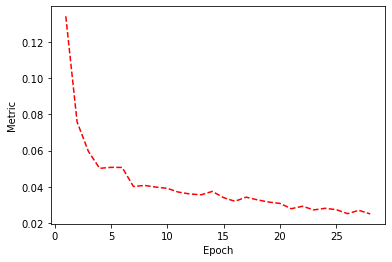

In [24]:
# Get training and test loss histories
training_loss = history.history['mae']
test_loss = history.history['val_mae']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.show();

In [25]:
y_predicted = model.predict(seq_array, verbose = 1, batch_size = 64)
#y_classes = np.argmax(y_predicted, axis = 1)
y_real = label_array

276/276 [==============================] - 11s 34ms/step


In [26]:
y_predicted_df = pd.DataFrame(y_predicted)
y_real_df = pd.DataFrame(y_real)
#replace all values above 0.9 with 1
y_predicted_df[y_predicted_df > 0.9] = 1.0
y_predicted_df[y_predicted_df < 0.9] = 0.0
y_predicted_df.columns = ["predicted_values"]
y_real_df.columns = ["real_values"]

y_real_predicted_train = pd.concat([y_real_df, y_predicted_df],axis=1, ignore_index=True, sort=False)
y_real_predicted_train.columns = ['real_values', 'predicted_values']
cm = confusion_matrix(y_real, y_predicted)
print(cm)

precision = precision_score(y_real_df, y_predicted_df)
recall = recall_score(y_real_df, y_predicted_df)

print(precision)
print(recall)

[[14499    32]
 [  443  2657]]
0.9880996653030867
0.8570967741935483


In [27]:
seq_array_test_last = [df_test[df_test['engine_id']==id][sequence_columns].values[-sequence_length:] 
                       for id in df_test['engine_id'].unique() if len(df_test[df_test['engine_id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(100, 30, 18)

In [28]:
y_mask = [len(df_test[df_test['engine_id']==id]) >= sequence_length for id in df_test['engine_id'].unique()]
label_array_test_last = df_test.groupby('engine_id')['label_2'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(100, 1)

In [32]:
# make predictions and compute confusion matrix
y_pred_test = model.predict(seq_array_test_last)
y_true_test = label_array_test_last
y_pr_t = pd.DataFrame(y_pred_test)

4/4 [==============================] - 0s 20ms/step


In [33]:
y_pr_t[y_pr_t > 0.995] = 1.0 
y_pr_t[y_pr_t < 0.995] = 0.0
y_tr_t = pd.DataFrame(y_true_test)

df_combo = pd.concat([y_tr_t, y_pr_t],axis=1, ignore_index=True, sort=False)
df_combo.columns = ['real_values', 'predicted_values']
pred_list = (df_combo['predicted_values'].values)


cm = confusion_matrix(y_tr_t, y_pr_t)
print(cm)

[[64 11]
 [ 1 24]]


In [34]:
precision_test = precision_score(y_tr_t, y_pr_t)
recall_test = recall_score(y_tr_t, y_pr_t)
print(precision_test)
print(recall_test)

0.6857142857142857
0.96
